In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from Utils import Preprocessing
from Models import ConvMassimo

2023-09-29 16:26:37.143777: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 16:26:37.174002: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-29 16:26:37.174033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-29 16:26:37.174055: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-29 16:26:37.179809: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 16:26:37.180197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
dict_train_count, dict_test_count, class_weights = Preprocessing.class_occurences()

In [4]:
dict_train_count

{'ModerateDemented': 52,
 'VeryMildDemented': 1792,
 'MildDemented': 717,
 'NonDemented': 2560,
 'Total': 5121}

In [5]:
class_weights

{'ModerateDemented': 98.48076923076923,
 'VeryMildDemented': 2.857700892857143,
 'MildDemented': 7.142259414225942,
 'NonDemented': 2.000390625,
 'Total': 1.0}

In [6]:
dict_test_count

{'ModerateDemented': 12,
 'VeryMildDemented': 448,
 'MildDemented': 179,
 'NonDemented': 640,
 'Total': 1279}

In [7]:
X_train, y_train, labels_list_train, X_test, y_test, labels_list_test = Preprocessing.to_numpy_arrays(class_weights=class_weights)

In [8]:
validation_percentage = 0.25
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_list_val = labels_list_train[int(1-validation_percentage * len(labels_list_train)):]
labels_list_train = labels_list_train[:int(1-validation_percentage * len(labels_list_train))]

In [9]:
X_train.shape

(3842, 208, 176)

In [10]:
X_val.shape

(1279, 208, 176)

In [11]:
#model.summary()

In [16]:
model = ConvMassimo.build_Model(img_height=208, img_width=176)
hystory = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 128, epochs=200, verbose=1) #, validation_data=(val_x, val_y)

Epoch 1/200


2023-09-29 16:30:12.579695: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 562591744 exceeds 10% of free system memory.
2023-09-29 16:30:14.208753: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 581058560 exceeds 10% of free system memory.
2023-09-29 16:30:14.379373: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 143720448 exceeds 10% of free system memory.
2023-09-29 16:30:14.503021: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 137625600 exceeds 10% of free system memory.
2023-09-29 16:30:14.819966: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 137625600 exceeds 10% of free system memory.


18/31 [================>.............] - ETA: 35s - loss: 99.8888 - mae: 2.7778

KeyboardInterrupt: 

: 

<Axes: >

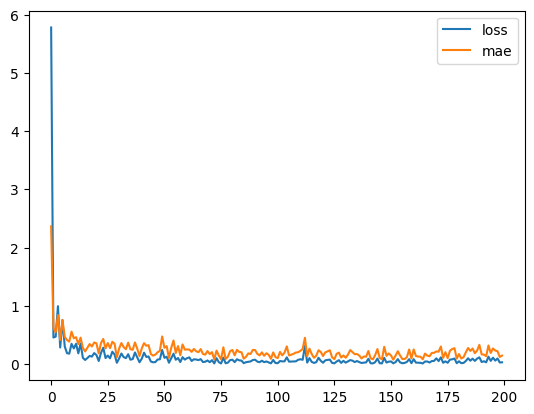

In [15]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory.plot()